In [44]:
%load_ext autoreload
%autoreload 2
import cne
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
fig_path = os.path.expanduser("~/data/nce/figures") 

In [46]:
# load MNIST
mnist_train = torchvision.datasets.MNIST(train=True,
                                         download=True, 
                                         transform=None,
                                         root="./"
                                         )
x_train, y_train = mnist_train.data.float().numpy(), mnist_train.targets

mnist_test = torchvision.datasets.MNIST(train=False,
                                        download=True, 
                                        transform=None,
                                        root="./"
                                        )
x_test, y_test = mnist_test.data.float().numpy(), mnist_test.targets

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


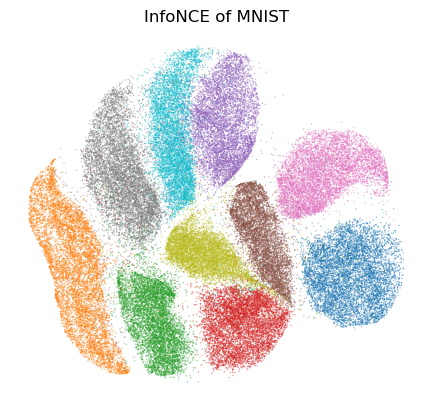

In [55]:
# default CNE (using the InfoNCE loss)
embedder = cne.CNE()
embd = embedder.fit_transform(x)

plt.figure()
plt.scatter(*embd.T, c=y, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"InfoNCE of MNIST")
plt.savefig(os.path.join(fig_path, "default_mnist.png"), dpi=300)
plt.show()

Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


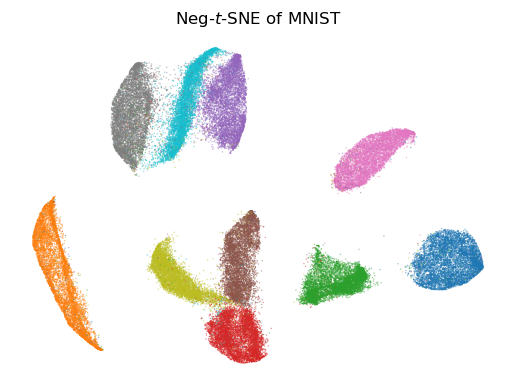

In [56]:
# non-parametric Neg-t-SNE
embedder_neg = cne.CNE(loss_mode="neg")
embd_neg = embedder_neg.fit_transform(x)

plt.figure()
plt.scatter(*embd_neg.T, c=y, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.title(r"Neg-$t$-SNE of MNIST")
plt.savefig(os.path.join(fig_path, "negtsne_mnist.png"), dpi=300)
plt.show()

Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


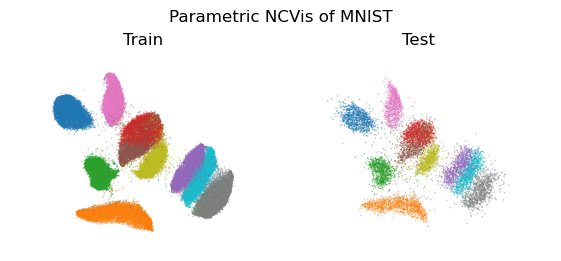

In [57]:
# parametric NCVis, highlighting the embedding of new points
embedder_ncvis = cne.CNE(loss_mode="nce",
                         optimizer="adam",
                         parametric=True)
embd_ncvis_train = embedder_ncvis.fit_transform(x_train)  # only train with training set
embd_ncvis_test = embedder_ncvis.transform(x_test)  # transform test set with the trained model

# plot
titles = ["Train", "Test"]
fig, ax = plt.subplots(1, 2, figsize=(5.5, 2.5), constrained_layout=True)
ax[0].scatter(*embd_ncvis_train.T, c=y_train, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")
ax[1].scatter(*embd_ncvis_test.T, c=y_test, alpha=0.5, s=1.0, cmap="tab10", edgecolor="none")

for i in range(2):
    ax[i].set_title(titles[i])
    ax[i].set_aspect("equal", "datalim")
    ax[i].axis("off")

fig.suptitle("Parametric NCVis of MNIST")
plt.savefig(os.path.join(fig_path, "parametric_ncvis_mnist.png"), dpi=300)
plt.show()

In [58]:
# spectrum with neg 
spec_params = [0.0, 0.5, 1.0]

neg_embeddings = {}
for s in spec_params:
    embedder = cne.CNE(loss_mode="neg",
                       s=s)
    embd = embedder.fit_transform(x)
    neg_embeddings[s] = embd

Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


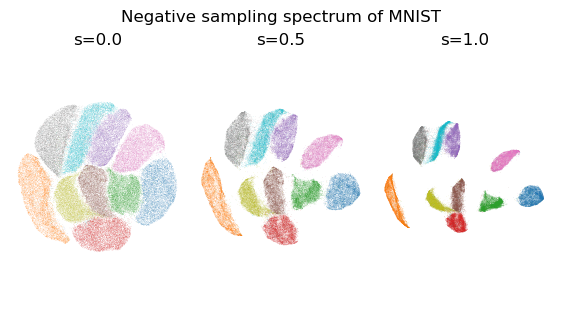

In [59]:
# plot embeddings
fig, ax = plt.subplots(1, len(spec_params), figsize=(5.5, 3), constrained_layout=True)
for i, s in enumerate(spec_params):
    ax[i].scatter(*neg_embeddings[s].T, c=y, alpha=0.5, s=0.1, cmap="tab10", edgecolor="none")
    ax[i].set_aspect("equal", "datalim")
    ax[i].axis("off")
    ax[i].set_title(f"s={s}")

fig.suptitle("Negative sampling spectrum of MNIST")
plt.show()
fig.savefig(os.path.join(fig_path, f"neg_spectrum_mnist.png"), dpi=300)

In [60]:
# spectrum with infonce 
spec_params = [0.0, 0.5, 1.0]

ince_embeddings = {}
for s in spec_params:
    embedder = cne.CNE(negative_samples=500,  # more negative samples for better local quality
                       s=s)
    embd = embedder.fit_transform(x)
    ince_embeddings[s] = embd

Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


Computing approximate kNN graph with pykeops


Finished epoch 0/200
Finished epoch 40/200
Finished epoch 80/200
Finished epoch 120/200
Finished epoch 160/200


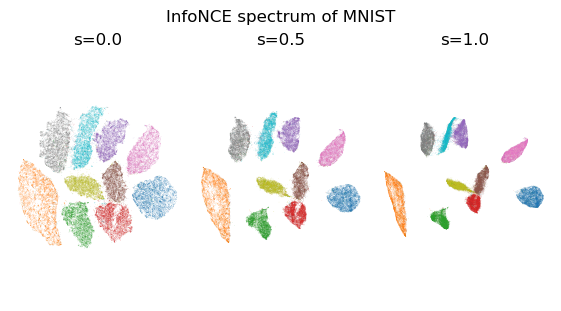

In [61]:
# plot embeddings
fig, ax = plt.subplots(1, len(spec_params), figsize=(5.5, 3), constrained_layout=True)
for i, s in enumerate(spec_params):
    ax[i].scatter(*ince_embeddings[s].T, c=y, alpha=0.5, s=0.1, cmap="tab10", edgecolor="none")
    ax[i].set_aspect("equal", "datalim")
    ax[i].axis("off")
    ax[i].set_title(f"s={s}")
    


fig.suptitle("InfoNCE spectrum of MNIST")
plt.show()
fig.savefig(os.path.join(fig_path, f"infonce_spectrum_mnist_m_500.png"), dpi=300)